In [74]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import itertools
from collections import Counter
from networkx.drawing.nx_agraph import graphviz_layout
from skbio.stats.composition import ilr
from skbio.stats.composition import clr
from skbio.stats.composition import multiplicative_replacement
import seaborn as sns
from matplotlib import rcParams
sns.set()
sns.set(font_scale=1.3)

## Load Bacterial Taxonomic Lineages

In [75]:
# Phylum Gram Type Dictionary
BacterialPhylums = {"Acidobacteria":'Gram_Negative',"Actinobacteria":'Gram_Positive',"Aquificae":'Gram_Negative',"Armatimonadetes":'Gram_Negative',"Bacteroidetes":'Gram_Negative',"Balneolaeota":'Unknown',"Caldiserica":"Unknown","Calditrichaeota":"Unknown","Chlamydiae":'Gram_Negative',"Chlorobi":"Unknown","Chloroflexi":"Unknown","Chrysiogenetes":"Unknown","Coprothermobacterota":"Unknown","Cyanobacteria":"Unknown","Deferribacteres":"Gram_Negative","Deinococcus-Thermus":"Gram_Negative","Dictyoglomi":"Gram_Negative","Elusimicrobia":"Unknown","Fibrobacteres":"Unknown","Firmicutes":"Gram_Positive","Fusobacteria":"Gram_Negative","Gemmatimonadetes":"Gram_Negative","Kiritimatiellaeota":"Unkown","Lentisphaerae":"Unknown","Nitrospirae":"Unknown","Planctomycetes":"Unknown","Proteobacteria":"Gram_Negative","Rhodothermaeota":"Unknown","Spirochaetes":"Gram_Negative","Synergistetes":"Gram_Negative","Tenericutes":"Unknown","Thermodesulfobacteria":"Unknown","Thermotogae":"Gram_Negative","Verrucomicrobia":"Unknown"}

In [76]:
accTaxDictDF = pd.read_csv("./DataFiles/Dataframes/Master_Rename.csv")
accTaxDictDF.set_index("Bacterial_Strain", inplace=True)
accTaxDictDF.head(10)

,Accession,TaxID,Species,Genus,Family,Order,Class,Phylum
Bacterial_Strain,,,,,,,,
Clostridioides_difficile_QCD66c26,NZ_CM000441.1,455631,Clostridioides_difficile,Clostridioides,Peptostreptococcaceae,Clostridiales,Clostridia,Firmicutes
Bacillus_cereus_m1293_strainm1293,NZ_CM000714.1,526973,Bacillus_cereus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_mycoides_DSM_2048_strainDSM_2048,NZ_CM000742.1,526997,Bacillus_mycoides,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_cereus_AH1273_strainAH1273,NZ_CM000741.1,526994,Bacillus_cereus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Bacillus_pseudofirmus_OF4_strainOF4,NC_013791.2,398511,Bacillus_pseudofirmus,Bacillus,Bacillaceae,Bacillales,Bacilli,Firmicutes
Corynebacterium_jeikeium_K411,NC_007164.1,306537,Corynebacterium_jeikeium,Corynebacterium,Corynebacteriaceae,Corynebacteriales,Actinobacteria,Actinobacteria
Ureaplasma_parvum_serovar_3_str_ATCC_700970_strainATCC_700970,NC_002162.1,273119,Ureaplasma_parvum,Ureaplasma,Mycoplasmataceae,Mycoplasmatales,Mollicutes,Tenericutes
Yersinia_pestis_KIM10,NC_004088.1,187410,Yersinia_pestis,Yersinia,Yersiniaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria
Escherichia_coli_O157:H7_str_EDL933_strainEDL933,NC_002655.2,155864,Escherichia_coli,Escherichia,Enterobacteriaceae,Enterobacterales,Gammaproteobacteria,Proteobacteria


## LOAD SPECIES ABUNDANCE DFs

In [77]:
americanSpeciesALL = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/masterAmerican_allSpecies.csv").set_index("SampleName")
indianSpeciesALL = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/masterIndian_allSpecies.csv").set_index("SampleName")
europeanSpeciesALL = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/masterEuropean_allSpecies.csv").set_index("SampleName")
japaneseSpeciesALL = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/masterJapanese_allSpecies.csv").set_index("SampleName")

In [78]:
americanSpecies90 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterAmerican_90%Prev_Species.csv").set_index("SampleName")
indianSpecies90 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterIndian_90%Prev_Species.csv").set_index("SampleName")
europeanSpecies90 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterEuropean_90%Prev_Species.csv").set_index("SampleName")
japaneseSpecies90 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterJapanese_90%Prev_Species.csv").set_index("SampleName")

In [79]:
americanSpecies100 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterAmerican_100%Prev_Species.csv").set_index("SampleName")
indianSpecies100 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterIndian_100%Prev_Species.csv").set_index("SampleName")
europeanSpecies100 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterEuropean_100%Prev_Species.csv").set_index("SampleName")
japaneseSpecies100 = pd.read_csv("./DataFiles/Dataframes/speciesDataframes/PrevFiltered/masterJapanese_100%Prev_Species.csv").set_index("SampleName")

In [80]:
print("American "+str(americanSpecies90.shape))
print("Indian "+str(indianSpecies90.shape))
print("European "+str(europeanSpecies90.shape))
print("Japanese "+str(japaneseSpecies90.shape))

American (202, 127)
Indian (106, 116)
European (120, 182)
Japanese (178, 150)


## Load Genera Abundance DFs

In [81]:
americanGeneraALL = pd.read_csv("./DataFiles/Dataframes/genusDataframes/masterAmerican_allGenera.csv").set_index("SampleName")
indianGeneraALL = pd.read_csv("./DataFiles/Dataframes/genusDataframes/masterIndian_allGenera.csv").set_index("SampleName")
europeanGeneraALL = pd.read_csv("./DataFiles/Dataframes/genusDataframes/masterEuropean_allGenera.csv").set_index("SampleName")
japaneseGeneraALL = pd.read_csv("./DataFiles/Dataframes/genusDataframes/masterJapanese_allGenera.csv").set_index("SampleName")

In [82]:
AmericanGenera90 = pd.read_csv("./DataFiles/Dataframes/genusDataframes/PrevFiltered/masterAmerican_90%Prev_Genera.csv")
IndianGenera90 = pd.read_csv("./DataFiles/Dataframes/genusDataframes/PrevFiltered/masterIndian_90%Prev_Genera.csv")
JapaneseGenera90 = pd.read_csv("./DataFiles/Dataframes/genusDataframes/PrevFiltered/masterJapanese_90%Prev_Genera.csv")
EuropeanGenera90 = pd.read_csv("./DataFiles/Dataframes/genusDataframes/PrevFiltered/masterEuropean_90%Prev_Genera.csv")

## Load Phylum Abundance DFs

In [83]:
americanPhylumALL = pd.read_csv("./DataFiles/Dataframes/phylumDataframes/masterAmerican_allPhylum.csv").set_index("SampleName")
indianPhylumALL = pd.read_csv("./DataFiles/Dataframes/phylumDataframes/masterIndian_allPhylum.csv").set_index("SampleName")
europeanPhylumALL = pd.read_csv("./DataFiles/Dataframes/phylumDataframes/masterEuropean_allPhylum.csv").set_index("SampleName")
japanesePhylumALL = pd.read_csv("./DataFiles/Dataframes/phylumDataframes/masterJapanese_allPhylum.csv").set_index("SampleName")

## Explore the Community

In [84]:
# These are total unique species across all cohorts
HundredSetHealthyUniquSpecies = set(list(americanSpecies100.columns) + list(indianSpecies100.columns) + list(europeanSpecies100.columns) + list(japaneseSpecies100.columns))
NinetySetHealthyUniqueSpecies = set(list(americanSpecies90.columns) + list(indianSpecies90.columns) + list(europeanSpecies90.columns) + list(japaneseSpecies90.columns))
NinetySetHealthyUniqueGenera = set(list(AmericanGenera90.columns) + list(IndianGenera90.columns) + list(EuropeanGenera90.columns) + list(JapaneseGenera90.columns))

In [85]:
len(NinetySetHealthyUniqueSpecies)

202

In [86]:
# See how many of the 90% prevalent species are shared across all healthy samples.
NinetySharedHealthySpecies = []
for i in NinetySetHealthyUniqueSpecies:
    if i =='Cohort':
        continue
    else:
        if i in list(americanSpecies90.columns) and i in list(indianSpecies90.columns) and i in list(europeanSpecies90.columns) and i in list(japaneseSpecies90.columns):
            NinetySharedHealthySpecies.append(i)
print(len(NinetySharedHealthySpecies))

94


In [87]:
#####################################################################################################################

In [88]:
# Strains 0% dataframes cohort names added.
aAllspecies = americanSpeciesALL.copy()
iAllspecies = indianSpeciesALL.copy()
eAllspecies = europeanSpeciesALL.copy()
jAllspecies = japaneseSpeciesALL.copy()

aAllspecies['Cohort'] = 'American'
iAllspecies['Cohort'] = 'Indian' 
eAllspecies['Cohort'] = 'European'
jAllspecies['Cohort'] = 'Japanese'

a100species = americanSpecies100.copy()
i100species = indianSpecies100.copy()
e100species = europeanSpecies100.copy()
j100species = japaneseSpecies100.copy()

a100species['Cohort'] = 'American'
i100species['Cohort'] = 'Indian' 
e100species['Cohort'] = 'European'
j100species['Cohort'] = 'Japanese'

a90species = americanSpecies90.copy()
i90species = indianSpecies90.copy()
e90species = europeanSpecies90.copy()
j90species = japaneseSpecies90.copy()

a90species['Cohort'] = 'American'
i90species['Cohort'] = 'Indian' 
e90species['Cohort'] = 'European'
j90species['Cohort'] = 'Japanese'

aALLgenera = americanGeneraALL.copy()
iALLgenera = indianGeneraALL.copy()
eALLgenera = europeanGeneraALL.copy()
jALLgenera = japaneseGeneraALL.copy()

aALLgenera['Cohort'] = 'American'
iALLgenera['Cohort'] = 'Indian' 
eALLgenera['Cohort'] = 'European'
jALLgenera['Cohort'] = 'Japanese'

aALLphlyum = americanPhylumALL.copy()
iALLphlyum = indianPhylumALL.copy()
eALLphlyum = europeanPhylumALL.copy()
jALLphlyum = japanesePhylumALL.copy()

aALLphlyum['Cohort'] = 'American'
iALLphlyum['Cohort'] = 'Indian' 
eALLphlyum['Cohort'] = 'European'
jALLphlyum['Cohort'] = 'Japanese'

## START MERGING INTO LARGE ALL COHORT DFs

In [89]:
globalSpeciesAll = pd.concat([aAllspecies,iAllspecies,eAllspecies,jAllspecies], sort=True)
globalSpecies100 = pd.concat([a100species,i100species,e100species,j100species], sort=True)
globalSpecies90 = pd.concat([a90species,i90species,e90species, j90species], sort=True)

globalGeneraAll = pd.concat([aALLgenera,iALLgenera,eALLgenera,jALLgenera], sort=True)
globalPhylumAll = pd.concat([aALLphlyum,iALLphlyum,eALLphlyum,jALLphlyum], sort=True)

## GRAB SPECIES FOR NETWORKS

In [90]:
#GRAB THE NAME OF THE SAMPLES
paper1CohortSamples = set(list(americanSpecies90.index)+list(indianSpecies90.index)+list(europeanSpecies90.index)+list(japaneseSpecies90.index))
len(paper1CohortSamples)

606

In [91]:
#GENERATE A NEW DATAFRAME WITH ORIGINAL RELATIVE ABUNDANCES WITH SAMPLES AND SHARED SPECIES ABOVE 90% PREVALENCE.
BSDF_90 = globalSpeciesAll[list(NinetySetHealthyUniqueSpecies)].loc[paper1CohortSamples].copy()
BSDF_100 = globalSpeciesAll[list(HundredSetHealthyUniquSpecies)].loc[paper1CohortSamples].copy()

In [92]:
from tqdm import tqdm

paper100 = BSDF_100.replace(0.0, np.nan).dropna(axis=1).copy()
clr_paper100 = paper100.copy()

for row in tqdm(paper100.index):
    clr_paper100.loc[row] = clr(np.array(paper100.loc[row].replace(0.0, 1e-10)))
    
clr_paper100['Cohort'] = globalSpeciesAll['Cohort']

american100 = clr_paper100[clr_paper100['Cohort']=='American'].copy()
indian100 = clr_paper100[clr_paper100['Cohort']=='Indian'].copy()
european100 = clr_paper100[clr_paper100['Cohort']=='European'].copy()
japanese100 = clr_paper100[clr_paper100['Cohort']=='Japanese'].copy()

american100.drop(columns=['Cohort'], inplace=True)
indian100.drop(columns=['Cohort'], inplace=True)
european100.drop(columns=['Cohort'], inplace=True)
japanese100.drop(columns=['Cohort'], inplace=True)

100%|██████████| 606/606 [00:00<00:00, 983.29it/s]


In [93]:
#CLR TRANSFORMATION
from tqdm import tqdm

################################################### SPECIES #################################################

clr_species_90 = BSDF_90.copy()
clr_species_100 = BSDF_100.copy()

clr_species_90.fillna(0.0, inplace=True)
clr_species_100.fillna(0.0, inplace=True)

for row in tqdm(BSDF_90.index):
    clr_species_90.loc[row] = clr(np.array(BSDF_90.loc[row].replace(0.0, 1e-10)))
    
for row in tqdm(BSDF_100.index):
    clr_species_100.loc[row] = clr(np.array(BSDF_100.loc[row].replace(0.0, 1e-10)))
    
    
clr_species_90['Cohort'] = globalSpeciesAll['Cohort'].copy()
clr_species_100['Cohort'] = globalSpeciesAll['Cohort'].copy()

cohort90DF = clr_species_90.copy()

100%|██████████| 606/606 [00:00<00:00, 1093.86it/s]


In [94]:
american_90_clr = clr_species_90[clr_species_90['Cohort']=='American'].drop(columns=['Cohort']).copy()
indian_90_clr = clr_species_90[clr_species_90['Cohort']=='Indian'].drop(columns=['Cohort']).copy()
japanese_90_clr = clr_species_90[clr_species_90['Cohort']=='Japanese'].drop(columns=['Cohort']).copy()
european_90_clr = clr_species_90[clr_species_90['Cohort']=='European'].drop(columns=['Cohort']).copy()

In [95]:
print(american_90_clr.shape)
print(indian_90_clr.shape)
print(japanese_90_clr.shape)
print(european_90_clr.shape)

(202, 202)
(106, 202)
(178, 202)
(120, 202)


## View Prevalence Distribution

In [96]:
def pullPrevalence(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], 'Cohort':[]}
    
    df2 = df[df['Cohort']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['Cohort'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['Cohort'].append(cohortname)
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [97]:
def pullPrevalenceAbundance(df, cohortname, taxlevel):
    taxHead = str('Bacterial_'+taxlevel)
    tempdic ={taxHead:[], 'Prevalence':[], "Mean_Relative_Abundance":[], 'Cohort':[]}
    
    df2 = df[df['Cohort']==cohortname].copy()
    df2.replace(0.0, np.nan, inplace=True)
    df2.drop(columns=['Cohort'], inplace=True)
    df2.dropna(axis=1,thresh=1, inplace=True)
    
    for column in df2.columns:
        tempdic['Prevalence'].append(len(df2[column].dropna())/df2.shape[0])
        tempdic[taxHead].append(column)
        tempdic['Cohort'].append(cohortname)
        tempdic['Mean_Relative_Abundance'].append(df2[column].mean())
        
    tempdf = pd.DataFrame(data=tempdic)
    return(tempdf)

In [98]:
aprev = pullPrevalence(globalSpeciesAll,'American','Species')
iprev = pullPrevalence(globalSpeciesAll,'Indian','Species')
eprev = pullPrevalence(globalSpeciesAll,'European','Species')
jprev = pullPrevalence(globalSpeciesAll,'Japanese','Species')

In [99]:
allPrevalence = pd.concat([aprev, iprev, eprev, jprev]).set_index("Bacterial_Species")
allPrevalence.head()

,Prevalence,Cohort
Bacterial_Species,,
Abiotrophia_defectiva,0.009901,American
Absiella_dolichum,0.940594,American
Acetanaerobacterium_elongatum,0.084158,American
Acetitomaculum_ruminis,0.099010,American
Acetivibrio_ethanolgignens,0.970297,American


## Look at Prevalence

In [100]:
aprevA = pullPrevalenceAbundance(globalSpeciesAll,'American','Species')
iprevA = pullPrevalenceAbundance(globalSpeciesAll,'Indian','Species')
eprevA = pullPrevalenceAbundance(globalSpeciesAll,'European','Species')
jprevA = pullPrevalenceAbundance(globalSpeciesAll,'Japanese','Species')

allPrevalenceAbundance = pd.concat([aprevA, iprevA, eprevA, jprevA]).set_index("Bacterial_Species")
allPrevalenceAbundance.head()

,Prevalence,Mean_Relative_Abundance,Cohort
Bacterial_Species,,,
Abiotrophia_defectiva,0.009901,0.000020,American
Absiella_dolichum,0.940594,0.000215,American
Acetanaerobacterium_elongatum,0.084158,0.000017,American
Acetitomaculum_ruminis,0.099010,0.000017,American
Acetivibrio_ethanolgignens,0.970297,0.000388,American


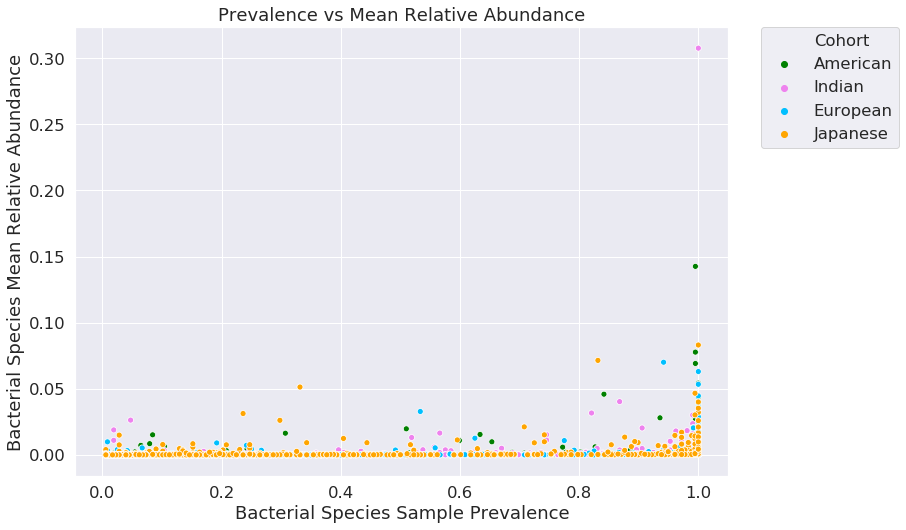

In [101]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
sns.set()
sns.set(font_scale=1.5)
palette ={"American":'green', "European":'deepskyblue', "Indian":'violet', "Japanese":'orange'}
sns.scatterplot(data=allPrevalenceAbundance, x='Prevalence', y='Mean_Relative_Abundance', hue='Cohort', palette=palette)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Prevalence vs Mean Relative Abundance')
plt.xlabel('Bacterial Species Sample Prevalence')
plt.ylabel('Bacterial Species Mean Relative Abundance')
plt.show()

In [102]:
##############################################################################################################

In [103]:
Prev90_speciesDF = allPrevalence[allPrevalence['Prevalence']>=0.90].copy()
for i in set(Prev90_speciesDF.Cohort):
    print(i)
    print(len(Prev90_speciesDF[Prev90_speciesDF['Cohort']==i]))

American
127
European
182
Japanese
146
Indian
109


In [104]:
sns.reset_orig()

In [105]:
sns.set()
sns.set(font_scale=1.3)

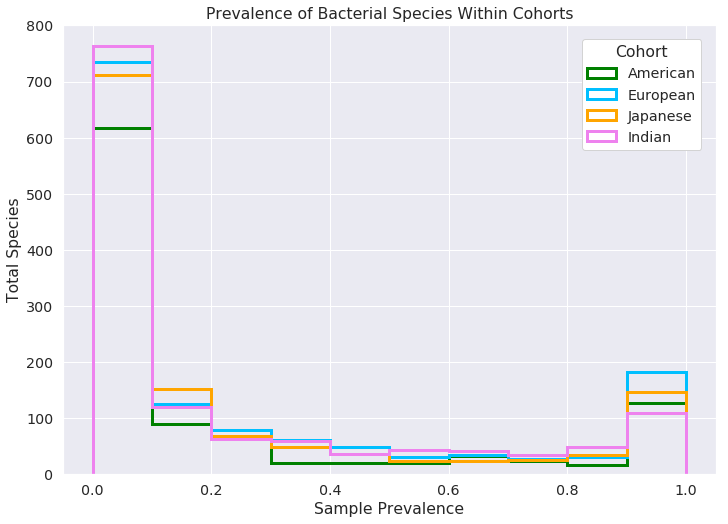

In [106]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 11.7,8.27
palette ={"American":'green', "European":'deepskyblue', "Indian":'violet', "Japanese":'orange'}

for Cohort in set(allPrevalence['Cohort']):
    subset = allPrevalence[allPrevalence['Cohort'] == Cohort].copy()
    sns_hist = sns.distplot(subset['Prevalence'], color=palette[Cohort] ,hist = True, kde = False, bins=[0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], label = Cohort, hist_kws={"histtype": "step", "linewidth": 3,"alpha": 1})
    
# Plot formatting
plt.title('Prevalence of Bacterial Species Within Cohorts')
plt.xlabel('Sample Prevalence')
plt.ylabel('Total Species')
plt.legend(loc=1, borderaxespad=1,framealpha=1, edgecolor='lightgrey', facecolor='white', title='Cohort')
fig = sns_hist.get_figure()
prevalenceFigure=fig
plt.show()

## View Total Sample Relative Abundance

In [107]:
def pullCohort90Abundance(df, cohort, cohort90columns):
    temp90AbundanceDictionary = {"SampleName":[], "Cohort":[], "Prevalent_Species_Total_Abundance":[]}
    for sample in list(globalSpeciesAll[globalSpeciesAll['Cohort']==cohort].index):
            temp90AbundanceDictionary['SampleName'].append(sample)
            temp90AbundanceDictionary['Cohort'].append(cohort)
            temp90AbundanceDictionary['Prevalent_Species_Total_Abundance'].append(globalSpeciesAll.loc[sample][cohort90columns.columns].sum())

    tempDF = pd.DataFrame(data=temp90AbundanceDictionary)
    return(tempDF.set_index("SampleName"))

In [108]:
aprevA90 = pullCohort90Abundance(allPrevalenceAbundance,'American', americanSpecies90)
iprevA90 = pullCohort90Abundance(allPrevalenceAbundance, 'Indian', indianSpecies90)
eprevA90 = pullCohort90Abundance(allPrevalenceAbundance, 'European', europeanSpecies90)
jprevA90 = pullCohort90Abundance(allPrevalenceAbundance, 'Japanese', japaneseSpecies90)


allPrevalenceAbundance90 = pd.concat([aprevA90, iprevA90, eprevA90, jprevA90])
allPrevalenceAbundance90.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
SRS011061,American,0.954406
SRS011084,American,0.934557
SRS011134,American,0.789025
SRS011239,American,0.955396
SRS011271,American,0.459255


In [109]:
def pullCohort90UnionAbundance(df, cohort):
    df2 = df[df["Cohort"]==cohort].copy()
    df2.drop(columns=['Cohort'], inplace=True)
    
    temp90AbundanceDictionary = {"SampleName":[], "Cohort":[], "Prevalent_Species_Total_Abundance":[]}
    for sample in list(df2.index):
            temp90AbundanceDictionary['SampleName'].append(sample)
            temp90AbundanceDictionary['Cohort'].append(cohort)
            temp90AbundanceDictionary['Prevalent_Species_Total_Abundance'].append(df2.loc[sample].sum())

    tempDF = pd.DataFrame(data=temp90AbundanceDictionary)
    return(tempDF.set_index("SampleName"))

In [110]:
#Generate Dataframe containing all species of the union for 90% for all samples. 
unionColumns = list(globalSpecies90.columns)
UnionSpeciesGlobal = globalSpeciesAll[unionColumns].copy()

In [111]:
auprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal,'American')
iuprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal, 'Indian')
euprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal, 'European')
juprevA90 = pullCohort90UnionAbundance(UnionSpeciesGlobal, 'Japanese')


allPrevalenceAbundanceU90 = pd.concat([auprevA90, iuprevA90, euprevA90, juprevA90])
#allPrevalence.to_csv("./DataFiles/Dataframes/Prevalence/allCohorts_speciesPrevalence.csv")
allPrevalenceAbundanceU90.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
SRS011061,American,0.989653
SRS011084,American,0.975524
SRS011134,American,0.963442
SRS011239,American,0.969643
SRS011271,American,0.971450


In [112]:
tempPrevDF = allPrevalenceAbundance90.copy()
for i in tempPrevDF.index:
    tempPrevDF.at[i,'Cohort'] = str(allPrevalenceAbundance90.at[i,'Cohort'])+" AC"

tempPrevDF2 = allPrevalenceAbundanceU90.copy()
for i in tempPrevDF2.index:
    tempPrevDF2.at[i,'Cohort'] = str(allPrevalenceAbundanceU90.at[i,'Cohort'])+" Sig"

tempPrevCombine = pd.concat([tempPrevDF,tempPrevDF2])
tempPrevCombine.sort_values(by='Cohort', inplace=True)
tempPrevCombine.head()

,Cohort,Prevalent_Species_Total_Abundance
SampleName,,
SRS011061,American AC,0.954406
SRS050752,American AC,0.700013
SRS050925,American AC,0.948703
SRS051031,American AC,0.945568
SRS051882,American AC,0.857364


In [113]:
CoreAbundance_DF = tempPrevCombine.copy()
for i in set(CoreAbundance_DF.Cohort):
    print(i)
    print(np.median(list(CoreAbundance_DF[CoreAbundance_DF['Cohort']==i]['Prevalent_Species_Total_Abundance'])))

European AC
0.9352900022844758
American AC
0.9342478256186475
Indian Sig
0.8903387435314971
Japanese AC
0.8057395148174546
Indian AC
0.868827208590576
European Sig
0.9506091667165377
American Sig
0.9648123864034925
Japanese Sig
0.9168228356558137


In [114]:
tempPrevCombine['Prevalent_Species_Total_Abundance'].median()

0.9224261670654468

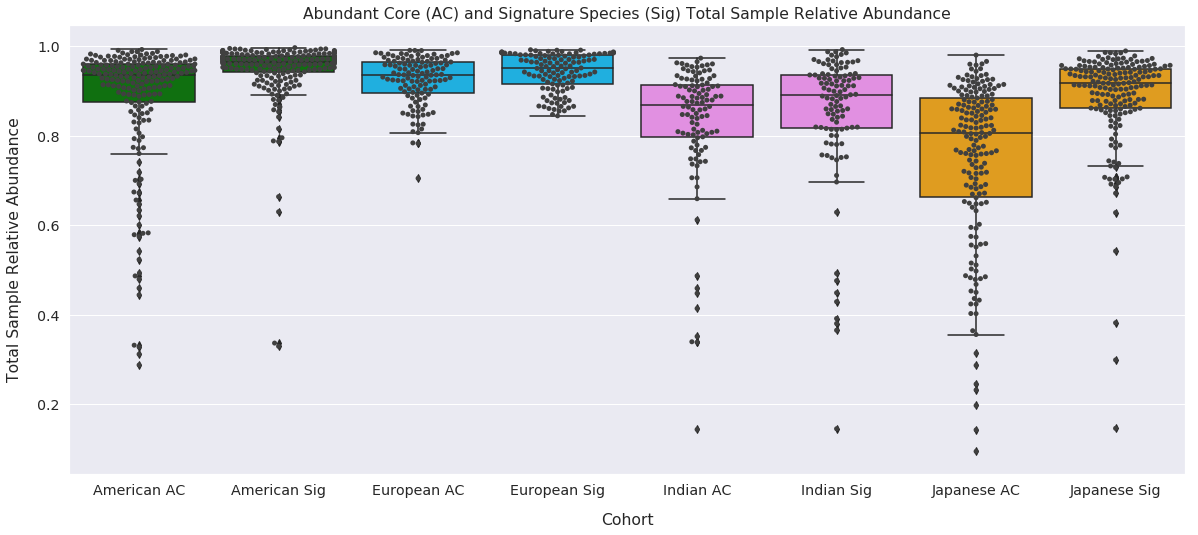

In [115]:
sns.set()
sns.set(font_scale=1.3)
from matplotlib import rcParams
rcParams['figure.figsize'] = 20,8.27
palette ={"American AC":"green","Indian AC":"violet", "European AC":"deepskyblue",'Japanese AC':'orange',"American Sig":"green","Indian Sig":"violet", "European Sig":"deepskyblue",'Japanese Sig':'orange'}

coList = set(tempPrevCombine.Cohort)
        
#meanss = {}
#for nation in coList:
#    meanss[nation] = tempPrevCombine[tempPrevCombine['Cohort']== nation]['Prevalent_Species_Total_Abundance'].median()
#meanss
#order = sorted(meanss, key=meanss.get)

ax = sns.boxplot(x='Cohort', y='Prevalent_Species_Total_Abundance', hue="Cohort", data=tempPrevCombine, palette=palette, dodge=False)
ax = sns.swarmplot(x="Cohort", y="Prevalent_Species_Total_Abundance", data=tempPrevCombine, color=".25")

ax.set_title("Abundant Core (AC) and Signature Species (Sig) Total Sample Relative Abundance")
ax.set_ylabel('Total Sample Relative Abundance', labelpad=15)
ax.set_xlabel('Cohort', labelpad=15)
ax.set_xticklabels(ax.get_xticklabels())

# Put the legend out of the figure
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
legend = ax.legend()
legend.remove()
fig = ax.get_figure()
abundanceFigure=fig
plt.show()

## View Community Richness of Samples

In [116]:
globalSpeciesAll.replace(0.0, np.nan, inplace=True)
SampleStrainCount = {"Sample":[], "Species_Count":[], "Cohort":[]}
for i in globalSpeciesAll.index:
    SampleStrainCount['Sample'].append(i)
    SampleStrainCount['Cohort'].append(globalSpeciesAll.at[i, "Cohort"])
    SampleStrainCount['Species_Count'].append(int(len(globalSpeciesAll.loc[i].dropna())))

SpeciesRichnessDF = pd.DataFrame(data=SampleStrainCount)
SpeciesRichnessDF.head()

,Sample,Species_Count,Cohort
0,SRS011061,247,American
1,SRS011084,229,American
2,SRS011134,334,American
3,SRS011239,237,American
4,SRS011271,273,American


In [117]:
tempSpeciesALL= {"Cohort":["American","Indian","European","Japanese"], "Species":[len(americanSpeciesALL.columns),len(indianSpeciesALL.columns),len(europeanSpeciesALL.columns),len(japaneseSpeciesALL.columns)],"DataFrame":["0% prevalence","0% prevalence","0% prevalence","0% prevalence"]}
tempSpeciesDFALL = pd.DataFrame(data=tempSpeciesALL)

tempGeneraALL= {"Cohort":["American","Indian","European","Japanese"], "Genera":[len(americanGeneraALL.columns),len(indianGeneraALL.columns),len(europeanGeneraALL.columns),len(japaneseGeneraALL.columns)],"DataFrame":["0% prevalence","0% prevalence","0% prevalence","0% prevalence"]}
tempGeneraDFALL = pd.DataFrame(data=tempGeneraALL)

tempPhylumALL= {"Cohort":["American","Indian","European","Japanese"], "Phylums":[len(americanPhylumALL.columns),len(indianPhylumALL.columns),len(europeanPhylumALL.columns),len(japanesePhylumALL.columns)],"DataFrame":["0% prevalence","0% prevalence","0% prevalence","0% prevalence"]}
tempPhylumDFALL = pd.DataFrame(data=tempPhylumALL)

tempDict_Species90 = {"Cohort":["American","Indian","European","Japanese"], "Species":[len(americanSpecies90.columns),len(indianSpecies90.columns),len(europeanSpecies90.columns), len(japaneseSpecies90.columns)], "DataFrame":["90% prevalence","90% prevalence","90% prevalence", "90% prevalence"]}
tempDF_Species90 = pd.DataFrame(data=tempDict_Species90)

tempDict_Species100 = {"Cohort":["American","Indian","European","Japanese"], "Species":[len(americanSpecies100.columns),len(indianSpecies100.columns),len(europeanSpecies100.columns),len(japaneseSpecies100.columns)], "DataFrame":["100% prevalence","100% prevalence","100% prevalence","100% prevalence"]}
tempDF_Species100 = pd.DataFrame(data=tempDict_Species100)

In [118]:
#This will look at all healthy cohorts and find what species are unique to them
def pullUniqueSpeciesForCohort2(df, taxlevel):    
    tempDict = {"Cohort":[],"Total_"+taxlevel:[], "Unique_"+taxlevel:[], "Shared_"+taxlevel:[]}
    organismDict = {}
    df2 = df.replace(0.0, np.nan).copy()
    
    cohortNames = [x for x in set(df2['Cohort'])]
    
    for cohort in cohortNames:
        cohortSet = set(df2[df2['Cohort']==cohort].dropna(thresh=1, axis=1).columns)
        otherSet = set(df2[df2['Cohort']!=cohort].dropna(thresh=1, axis=1).columns)
        
        cohortSet.remove("Cohort")
        otherSet.remove("Cohort")

        tempDict['Cohort'].append(cohort)
        tempDict['Total_'+taxlevel].append(len(cohortSet))
        organismDict[cohort] = [(cohortSet - otherSet)]
        tempDict['Unique_'+taxlevel].append(len(cohortSet - otherSet))
        tempDict['Shared_'+taxlevel].append(len(cohortSet) - len(cohortSet - otherSet))
        
    tempdf = pd.DataFrame(data=tempDict)
    return tempdf, organismDict

In [119]:
#ALL STRAINS  (Total is split between unique and shared)
UniqueSpeciesDF_ALL1, uniqueSpeciesDict_ALL = pullUniqueSpeciesForCohort2(globalSpeciesAll, 'Species')
UniqueSpeciesDF_ALL = UniqueSpeciesDF_ALL1.sort_values(by=['Unique_Species']).drop(columns=['Total_Species'])
UniqueSpeciesDF_ALL

,Cohort,Unique_Species,Shared_Species
0,American,126,904
2,Japanese,169,1103
3,Indian,231,1088
1,European,297,1054


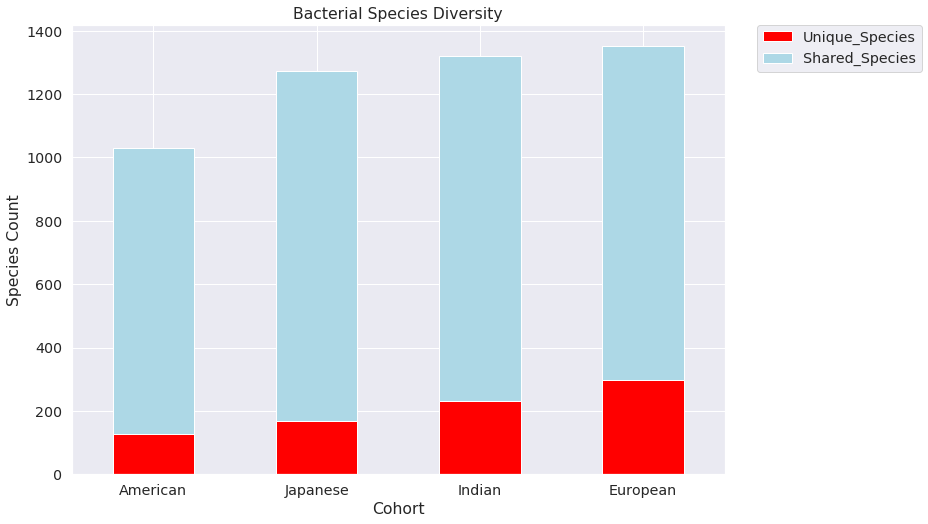

In [120]:
## Look at shared and Unique at 0% Prevalence
sns.set(font_scale=1.3)
rcParams['figure.figsize'] = 11.7,8.27
UniqueSpeciesDF_ALL.plot(kind='bar', stacked=True, x='Cohort', color=['red','lightblue'])
plt.ylabel("Species Count")
plt.title("Bacterial Species Diversity")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation=0)
plt.show()

## Run the PCA

In [121]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def runPCA(dataframe, filename, title, axLocation):
    pcaDF2 = dataframe.reset_index().drop("SampleName",axis=1).copy()
    pcaDF3 = pcaDF2.drop("Cohort", axis=1).copy()
    features = pcaDF3.columns
    x = pcaDF3.loc[:, features].values
    y = pcaDF2.loc[:,['Cohort']].values
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(x)
    principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2']).copy()
    finalDf = pd.concat([principalDf, pcaDF2[['Cohort']]], axis = 1).copy()
    import seaborn as sns
    from matplotlib import rcParams
    rcParams['figure.figsize'] = 11.7,8.27
    palette ={"American":'green', "European":'deepskyblue', "Indian":'violet', "Japanese":'orange'}

    fig = plt.figure(figsize = (10,10))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1 ('+str("%.2f" % (100*pca.explained_variance_ratio_[0]))+"% variance)", labelpad=15)
    ax.set_ylabel('Principal Component 2 ('+str("%.2f" % (100*pca.explained_variance_ratio_[1]))+"% variance)", labelpad=15)
    ax.set_title('Principal Component Analysis (CLR - '+title+')')

    targets = ['American','European','Indian', 'Japanese']
    colors = ['green','deepskyblue','violet','orange']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf ['Cohort'] == target
        if axLocation != 'nan':
            ax.scatter(finalDf .loc[indicesToKeep, 'principal component 1']
                       , finalDf .loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50, ax=axLocation)
        else:
            ax.scatter(finalDf .loc[indicesToKeep, 'principal component 1']
                       , finalDf .loc[indicesToKeep, 'principal component 2']
                       , c = color
                       , s = 50)
    ax.legend(targets, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0, title='Cohorts')
    rcParams['figure.figsize'] = 11.7,8.27
    ax = sns.set(font_scale=1.5)
    plt.show()
    return(fig)

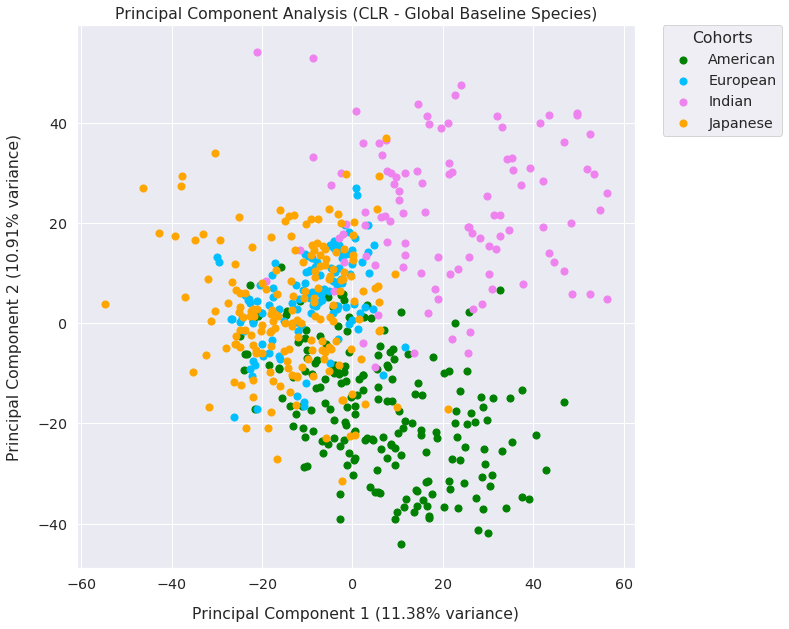

In [122]:
pcaImage = runPCA(clr_species_90, 'allCohorts_pca', 'Global Baseline Species', 'nan')

## PCoA - Bray-Curtis Distance

In [123]:
from scipy.spatial import distance
pcoaDF = pd.DataFrame(index=clr_species_90.index, columns=clr_species_90.index)
pcoaDF.fillna(0.0, inplace=True)
for i in pcoaDF.index:
    for y in pcoaDF.columns:
        pcoaDF.at[i,y]=distance.braycurtis(BSDF_90.loc[i], BSDF_90.loc[y])
pcoaDF.head()

SampleName,SRR5898928,DRR171567,SRS050422,SRS015133,ERR011109,SRS043001,DRR171555,SRS015960,SRS078242,SRS020328,...,ERR011217,SRR5898931,DRR171700,SRR5898992,DRR127755,ERR011195,SRS057717,SRR5898941,SRS013521,DRR171513
SampleName,,,,,,,,,,,,,,,,,,,,,
SRR5898928,0.000000,0.592200,0.614450,0.727656,0.824854,0.602163,0.454030,0.501949,0.620462,0.689908,...,0.676682,0.718459,0.496730,0.938436,0.684598,0.620425,0.710868,0.777877,0.556357,0.492594
DRR171567,0.592200,0.000000,0.498647,0.563797,0.638654,0.727861,0.423779,0.539845,0.414393,0.559716,...,0.568677,0.579909,0.514313,0.904352,0.682848,0.525949,0.866546,0.528460,0.660901,0.549658
SRS050422,0.614450,0.498647,0.000000,0.651900,0.713772,0.737762,0.534947,0.572867,0.580891,0.628758,...,0.430661,0.694059,0.513627,0.915216,0.649486,0.501997,0.862519,0.691512,0.713418,0.552591
SRS015133,0.727656,0.563797,0.651900,0.000000,0.638987,0.746496,0.626609,0.706938,0.683960,0.641799,...,0.638999,0.636977,0.581209,0.881100,0.634369,0.633601,0.779300,0.587954,0.784061,0.682677
ERR011109,0.824854,0.638654,0.713772,0.638987,0.000000,0.802624,0.693677,0.814702,0.733328,0.722068,...,0.628330,0.483770,0.742289,0.695311,0.765860,0.708041,0.902175,0.653535,0.658311,0.755806


In [125]:
from skbio.stats.ordination import pcoa
pcObject3 = pcoa(pcoaDF, number_of_dimensions=3)
metaDataDF = globalSpeciesAll.loc[pcoaDF.index][['Cohort']].copy()

/home/mark/anaconda3/lib/python3.6/site-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:152: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.8973098423821869 and the largest is 37.3484803616366.
  RuntimeWarning


## Plot 3D

In [126]:
df2 = pcObject3.samples.copy()
df2['Cohort'] = 'temp'
for i in df2.index:
    df2.at[i,'Cohort'] = metaDataDF.reset_index().iloc[int(i)]['Cohort']
df3 = df2[['Cohort']].copy()

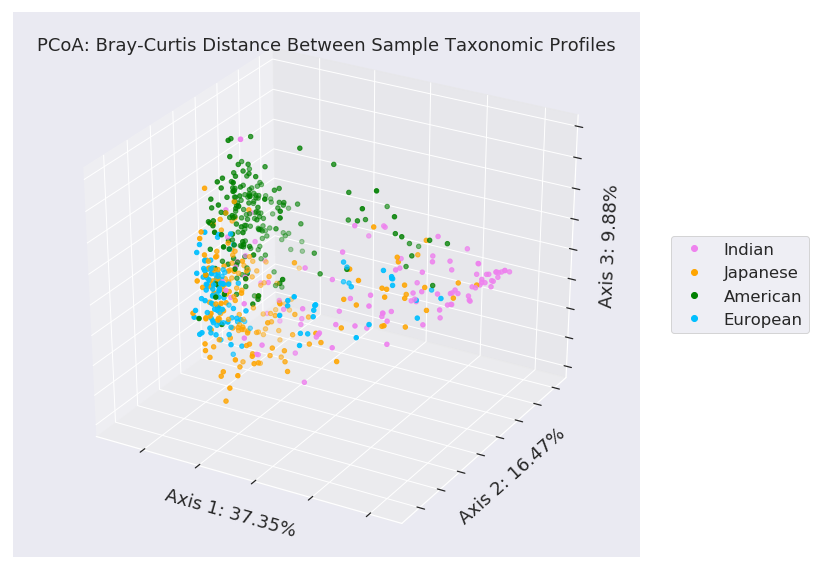

In [148]:
from matplotlib.colors import ListedColormap
#Pull out the proportion explained to append to graph
var2 = ["Axis 1: "+'%.2f' % pcObject3.eigvals.loc['PC1']+"%", "Axis 2: "+'%.2f' % pcObject3.eigvals.loc['PC2']+"%", "Axis 3: "+'%.2f' % pcObject3.eigvals.loc['PC3']+"%"]
cmap2 = ListedColormap(["violet", "orange", "green", "deepskyblue"])
fig = pcObject3.plot(df=df3, column='Cohort', title='PCoA: Bray-Curtis Distance Between Sample Taxonomic Profiles', cmap=cmap2, s=20, axis_labels=(var2[0], var2[1], var2[2]))
plt.show()

## 2D PCoA

In [128]:
twoDPcoaDF = pcObject3.samples[['PC1','PC2']].copy()
twoDPcoaDF['Cohort'] = list(metaDataDF['Cohort'])

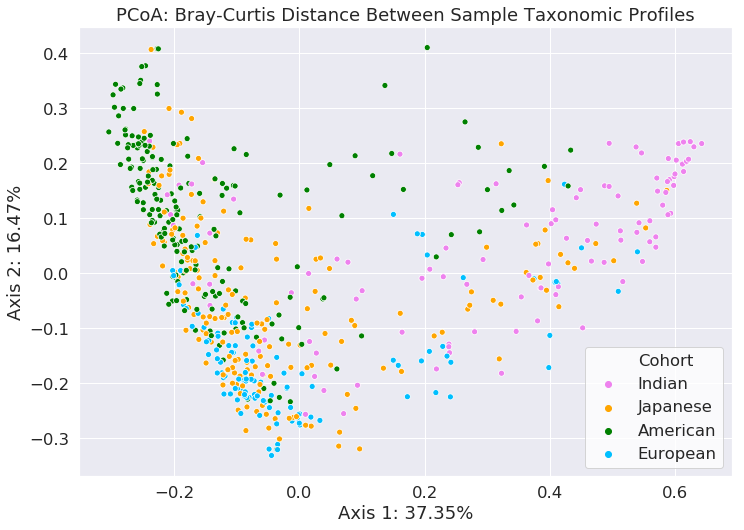

In [147]:
palette ={"American":'green', "European":'deepskyblue', "Indian":'violet', "Japanese":'orange'}
cmap2 = ListedColormap(["violet", "orange", "green", "deepskyblue"])

sns.scatterplot(data=twoDPcoaDF, x=twoDPcoaDF['PC1'], y=twoDPcoaDF['PC2'], hue='Cohort', palette=palette)
plt.legend(facecolor='white')
plt.title("PCoA: Bray-Curtis Distance Between Sample Taxonomic Profiles")
plt.xlabel("Axis 1: "+'%.2f' % pcObject3.eigvals.loc['PC1']+"%")
plt.ylabel("Axis 2: "+'%.2f' % pcObject3.eigvals.loc['PC2']+"%")
plt.show()